# training demo for sklearn models

In [1]:
import numpy as np
import pickle
import bz2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
%cd "drive/Othercomputers/My Mac/final-project-group-02"

/content/drive/Othercomputers/My Mac/final-project-group-02


In [4]:
!ls

 kaggle_csv.py			      Xka_tree.csv
 model_linear.bz2		      Xtr.csv
 model_neuralnet.pth		      Xtr_linear.csv
 model_tree.json		      Xtr_neuralnet.csv
 README.md			      Xtr_tree.csv
 training_demo_pytorch.ipynb	      yka_hat_linear.csv
 training_demo_sklearn.ipynb	      yka_hat_neuralnet.csv
 training_demo_xgboost_041025.ipynb  'yka hat tree.csv'
 training_demo_xgboost.ipynb	      yka_hat_tree.csv
 Xka.csv			      ytr.csv
 Xka_linear.csv			      ytr_neuralnet.csv
 Xka_neuralnet.csv


In [5]:
# load training data
Xtr_loadpath = 'Xtr.csv'
Xka_loadpath = 'Xka.csv'
ytr_loadpath = 'ytr.csv'

Xtr = np.loadtxt(Xtr_loadpath, delimiter=",")
Xka = np.loadtxt(Xka_loadpath, delimiter=",")
ytr = np.loadtxt(ytr_loadpath, delimiter=",")

In [6]:
# standardize the training data
Xtr_standardized = (Xtr-np.mean(Xtr))/np.std(Xtr) # revise this line as needed
Xka_standardized = (Xka-np.mean(Xka))/np.std(Xka) # revise this line as needed

Xtr_minmax = (Xtr-np.min(Xtr))/(np.max(Xtr)-np.min(Xtr)) # revise this line as needed
Xka_minmax = (Xka-np.min(Xka))/(np.max(Xka)-np.min(Xka))# revise this line as needed

Xtr_mean_norm = (Xtr-np.mean(Xtr))/(np.max(Xtr)-np.min(Xtr)) # revise this line as needed
Xka_mean_norm = (Xka-np.mean(Xka))/(np.max(Xka)-np.min(Xka))# revise this line as needed

# save the standardized training data
Xtr_savepath = 'Xtr_linear.csv' # could be Xtr_tree.bz2 if using sklearn for the tree competition!
Xka_savepath = 'Xka_linear.csv' # could be Xka_tree.bz2 if using sklearn for the tree competition!
yka_hat_savepath = 'yka_hat_linear.csv' # could be yka_tree.bz2 if using sklearn for the tree competition!

np.savetxt(Xtr_savepath, Xtr_standardized, delimiter=",")
np.savetxt(Xka_savepath, Xka_standardized, delimiter=",")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xtr_standardized, ytr, test_size=0.2, random_state=5)

X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(
    Xtr_minmax, ytr, test_size=0.2, random_state=5)
X_train_mean_norm, X_test_mean_norm, y_train_mean_norm, y_test_mean_norm = train_test_split(
    Xtr_mean_norm, ytr, test_size=0.2, random_state=5)

We try Ridge, Logistic Regression and SVC

In [8]:
#Testing Ridge, Logistic Regression and SVC on default parameters to choose the best model
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

ridge=Ridge()
ridge.fit(X_train,y_train)
print("Ridge score:",r2_score(y_test,ridge.predict(X_test)))

lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Logistic Regression score: ',balanced_accuracy_score(y_test,lr.predict(X_test)))

svc=SVC()
svc.fit(X_train,y_train)
print('SVC score: ',balanced_accuracy_score(y_test,svc.predict(X_test)))


Ridge score: 0.27135429654796006
Logistic Regression score:  0.35430384602823733
SVC score:  0.5800507597262031


In [ ]:
ridge_scale1=Ridge()
ridge_scale1.fit(X_train_minmax,y_train_minmax)
ridge_scale2=Ridge()
ridge_scale2.fit(X_train_mean_norm,y_train_mean_norm)
ridge_scale3=Ridge()
ridge_scale3.fit(X_train,y_train)
print('Ridge scaling 1: ',r2_score(y_test_minmax,ridge_scale1.predict(X_test_minmax)))
print('Ridge scaling 2: ',r2_score(y_test_mean_norm,ridge_scale2.predict(X_test_mean_norm)))
print('Ridge scaling 3: ',r2_score(y_test,ridge_scale3.predict(X_test)))

Ridge scaling 1:  0.2639305981524639
Ridge scaling 2:  0.263930598152463
Ridge scaling 3:  0.27135429654796006


In [ ]:
lr_scale1=LogisticRegression(max_iter=1000)
lr_scale1.fit(X_train_minmax,y_train_minmax)
lr_scale2=LogisticRegression(max_iter=1000)
lr_scale2.fit(X_train_mean_norm,y_train_mean_norm)
lr_scale3=LogisticRegression(max_iter=1000)
lr_scale3.fit(X_train,y_train)
print('Logistic Regression scaling 1: ',balanced_accuracy_score(y_test_minmax,lr_scale1.predict(X_test_minmax)))
print('Logistic Regression scaling 2: ',balanced_accuracy_score(y_test_mean_norm,lr_scale2.predict(X_test_mean_norm)))
print('Logistic Regression scaling 3: ',balanced_accuracy_score(y_test,lr_scale3.predict(X_test)))

Logistic Regression scaling 1:  0.18206830461333315
Logistic Regression scaling 2:  0.18503860164303612
Logistic Regression scaling 3:  0.35430384602823733


We thus go ahead with SVC model. We now try different types of standardization.


In [ ]:
svc_scale1=SVC()
svc_scale1.fit(X_train_minmax,y_train_minmax)
svc_scale2=SVC()
svc_scale2.fit(X_train_mean_norm,y_train_mean_norm)
svc_scale3=SVC()
svc_scale3.fit(X_train,y_train)
print('SVC scaling 1: ',balanced_accuracy_score(y_test_minmax,svc_scale1.predict(X_test_minmax)))
print('SVC scaling 2: ',balanced_accuracy_score(y_test_mean_norm,svc_scale2.predict(X_test_mean_norm)))
print('SVC scaling 3: ',balanced_accuracy_score(y_test,svc_scale3.predict(X_test)))

SVC scaling 1:  0.5800507597262031
SVC scaling 2:  0.5800507597262031
SVC scaling 3:  0.5800507597262031


All types of scaling give identical results. Thus, we will just go ahead with standardized scaling. Next we try feature selection

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_base.py:122: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(


Number of selected features: 0
Number of selected features: 0
Number of selected features: 1
Number of selected features: 5
Number of selected features: 8
Number of selected features: 9
Number of selected features: 9
Number of selected features: 9
Number of selected features: 9
Number of selected features: 9
Number of selected features: 9


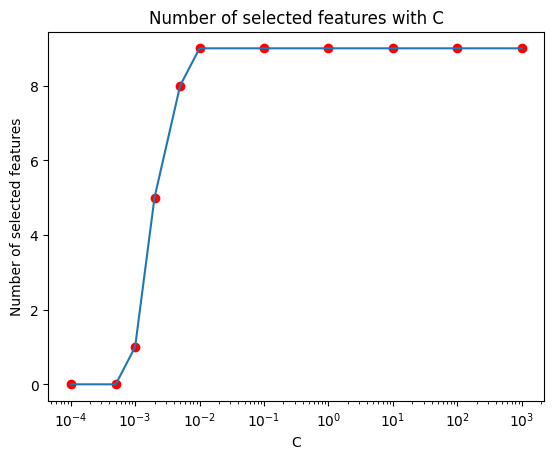

In [ ]:
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt

C = [0.0001,0.0005,0.001,0.002,0.005,0.01,0.1,1,10,100,1000]
features=np.zeros(len(C))
i=-1
for c in C:
  i=i+1
  lr_feat = LogisticRegression(C=c, solver='liblinear',penalty="l1", dual=False).fit(Xtr_standardized, ytr)
  model = SelectFromModel(lr_feat, prefit=True)
  features[i]=model.transform(Xtr_standardized).shape[1] #Selected features
  print("Number of selected features:",model.transform(Xtr_standardized).shape[1])

plt.plot(C,features)
plt.scatter(C,features,color='red')
plt.xlabel('C')
plt.ylabel('Number of selected features')
plt.title('Number of selected features with C')
plt.xscale('log')

C:  0.001 score:  0.17241246070948182
C:  0.01 score:  0.26792859056678237
C:  0.1 score:  0.33543522123151476
C:  1 score:  0.35430384602823733
C:  2 score:  0.35480135846604827
C:  100 score:  0.35430877189395826
C:  1000 score:  0.3548062843317692


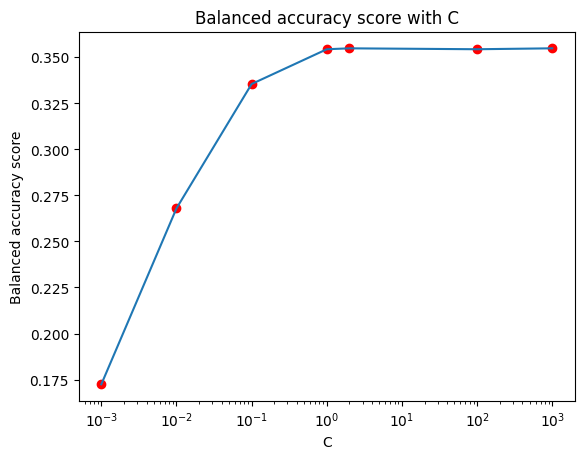

In [ ]:
C=[0.001,0.01,0.1,1,2,100,1000]
scores=np.zeros(len(C))
i=-1
for c in C:
  i=i+1
  lr_var=LogisticRegression(C=c)
  lr_var.fit(X_train,y_train)
  scores[i]=balanced_accuracy_score(y_test,lr_var.predict(X_test))
  print('C: ',c,'score: ',balanced_accuracy_score(y_test,lr_var.predict(X_test)))
plt.plot(C,scores)
plt.scatter(C,scores,color='red')
plt.xlabel('C')
plt.ylabel('Balanced accuracy score')
plt.title('Balanced accuracy score with C')
plt.xscale('log')

kernel:  linear score:  0.36383128616218047
kernel:  poly score:  0.40600975032409714
kernel:  rbf score:  0.5800507597262031
kernel:  sigmoid score:  0.230893056845323


Text(0.5, 1.0, 'Balanced accuracy score with kernel')

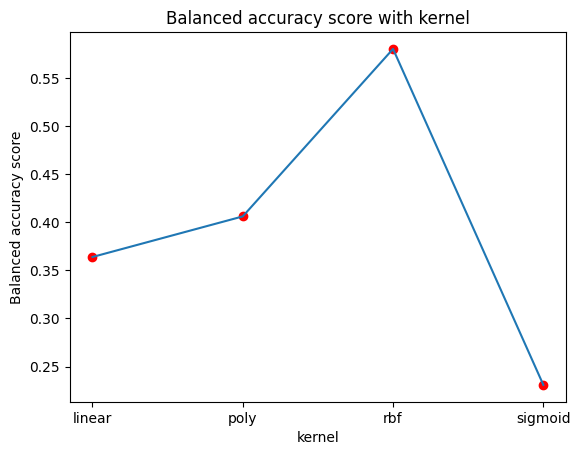

In [ ]:
kernels=['linear','poly','rbf','sigmoid']
scores_svc=np.zeros(len(kernels))
i=-1
for kernel in kernels:
  i=i+1
  svc_var=SVC(kernel=kernel)
  svc_var.fit(X_train,y_train)
  scores_svc[i]=balanced_accuracy_score(y_test,svc_var.predict(X_test))
  print('kernel: ',kernel,'score: ',balanced_accuracy_score(y_test,svc_var.predict(X_test)))
plt.plot(kernels,scores_svc)
plt.scatter(kernels,scores_svc,color='red')
plt.xlabel('kernel')
plt.ylabel('Balanced accuracy score')
plt.title('Balanced accuracy score with kernel')

C:  0.001 score:  0.1
C:  0.01 score:  0.1674074074074074
C:  0.1 score:  0.3646802707807784
C:  1 score:  0.5800507597262031
C:  10 score:  0.717491897184134
C:  50 score:  0.7846371337849665
C:  100 score:  0.8110565452281847
C:  500 score:  0.8267535173336862


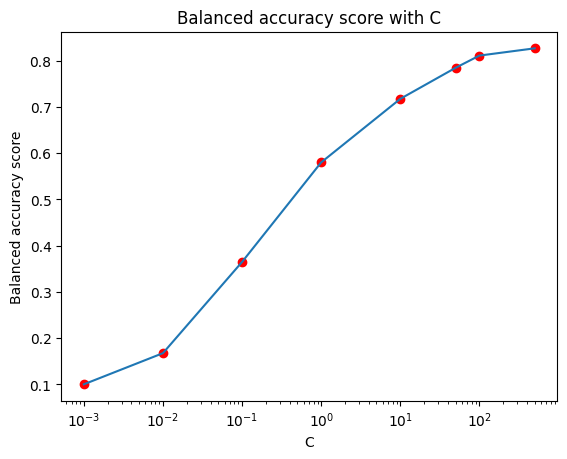

In [ ]:
C=[0.001,0.01,0.1,1,10,50,100,500]
scores_svc=np.zeros(len(C))
i=-1
for c in C:
  i=i+1
  svc_var=SVC(C=c)
  svc_var.fit(X_train,y_train)
  scores_svc[i]=balanced_accuracy_score(y_test,svc_var.predict(X_test))
  print('C: ',c,'score: ',balanced_accuracy_score(y_test,svc_var.predict(X_test)))
plt.plot(C,scores_svc)
plt.scatter(C,scores_svc,color='red')
plt.xlabel('C')
plt.ylabel('Balanced accuracy score')
plt.title('Balanced accuracy score with C')
plt.xscale('log')

gamma:  0.001 score:  0.23325171676898168
gamma:  0.01 score:  0.340518988645662
gamma:  0.1 score:  0.5747093926825945
gamma:  1 score:  0.6912932055523575
gamma:  1.2 score:  0.6756629684284052
gamma:  1.3 score:  0.6707365524476777
gamma:  2 score:  0.6281911648479495
gamma:  5 score:  0.484866690697859


Text(0.5, 1.0, 'Balanced accuracy score with gamma')

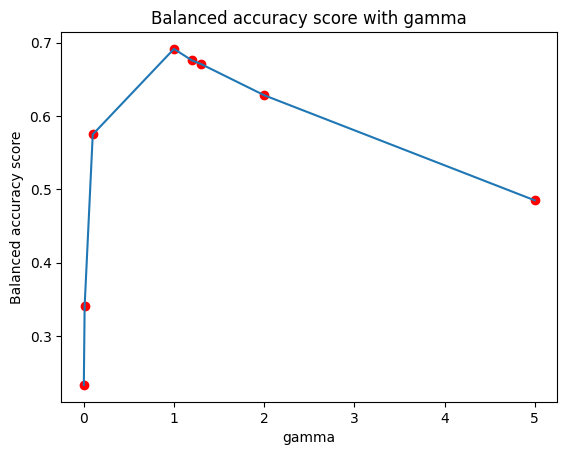

In [ ]:
gammas=[0.001,0.01,0.1,1,1.2,1.3,2,5]
scores_svc=np.zeros(len(gammas))
i=-1
for gamma in gammas:
  i=i+1
  svc_var=SVC(gamma=gamma)
  svc_var.fit(X_train,y_train)
  scores_svc[i]=balanced_accuracy_score(y_test,svc_var.predict(X_test))
  print('gamma: ',gamma,'score: ',balanced_accuracy_score(y_test,svc_var.predict(X_test)))
plt.plot(gammas,scores_svc)
plt.scatter(gammas,scores_svc,color='red')
plt.xlabel('gamma')
plt.ylabel('Balanced accuracy score')
plt.title('Balanced accuracy score with gamma')

In [ ]:
lassoiter=Lasso(alpha=0.01)
lassoiter.fit(Xtr_standardized,ytr)

nonzero = np.where(np.abs(lassoiter.coef_)>1e-5)
subset = np.where(nonzero)[0]
print("Number of selected features:",len(subset),"Feature set:",np.where(nonzero)[1])

Number of selected features: 8 Feature set: [1 2 3 4 5 6 7 8]


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

svc_feat = LinearSVC(C=0.01, penalty="l1", dual=False).fit(Xtr_standardized, ytr)
model = SelectFromModel(svc_feat, prefit=True)
model.transform(Xtr_standardized).shape #Selected features

(10000, 9)

After feature selection, we get almost the same number of features from LASSO and linear SVC, thus we proceed with all the features

In [ ]:
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
svc_testing=SVC()
svc_testing.fit(X_train,y_train)
print('test score: ',balanced_accuracy_score(y_test,svc_testing.predict(X_test)))
print('train score: ',balanced_accuracy_score(y_train,svc_testing.predict(X_train)))

test score:  0.5800507597262031
train score:  0.5907139522929745


In [10]:
from sklearn import model_selection
k = 10
kfo = model_selection.KFold(n_splits=k,shuffle=True)

In [ ]:
# attempt 1 - SVC model 1
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#pipe=Pipeline([('featsel',SelectFromModel(SVC()))])
C_var=np.array([75,100,150,200])
gamma_var=np.array([0.2,0.5,1,1.5])
#kerna_var=['linear','poly','rbf','sigmoid']
svc_1=SVC()
param_grid={'C':C_var,'gamma':gamma_var}
grid=GridSearchCV(svc_1,param_grid,cv=kfo,scoring='balanced_accuracy')
grid.fit(X_train,y_train)
grid.best_params_,grid.best_score_
acc_train_SVC = balanced_accuracy_score(y_train,grid.predict(X_train))
acc_test_SVC = balanced_accuracy_score(y_test,grid.predict(X_test))
print('training balanced-accuracy: ',acc_train_SVC)
print('test balanced-accuracy: ',acc_test_SVC)
svc_1_model=grid.best_estimator_

training balanced-accuracy:  0.9459650235495113
test balanced-accuracy:  0.8301224017903206


In [14]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

In [ ]:
grid_df=DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.473318,0.484549,0.249745,0.067976,75,0.2,"{'C': 75, 'gamma': 0.2}",0.802180,0.780336,0.821245,0.845169,0.814953,0.779048,0.776177,0.791647,0.734325,0.808829,0.795391,0.028917,6
1,5.019040,1.269073,0.368780,0.095661,75,0.5,"{'C': 75, 'gamma': 0.5}",0.779012,0.764407,0.797117,0.844642,0.819972,0.786765,0.791621,0.818070,0.768845,0.809626,0.798008,0.023881,3
2,4.771895,1.372284,0.401462,0.208767,75,1.0,"{'C': 75, 'gamma': 1.0}",0.729656,0.788520,0.791215,0.803248,0.803640,0.774256,0.731284,0.763076,0.766378,0.779895,0.773117,0.024973,9
3,7.374271,1.422434,0.551239,0.238985,75,1.5,"{'C': 75, 'gamma': 1.5}",0.686390,0.749550,0.724347,0.760072,0.770465,0.712000,0.690442,0.752993,0.722726,0.733924,0.730291,0.027097,14
4,3.198558,0.614498,0.322262,0.154004,100,0.2,"{'C': 100, 'gamma': 0.2}",0.800225,0.783132,0.818962,0.844342,0.813748,0.793345,0.775437,0.793431,0.745831,0.804737,0.797319,0.025249,5


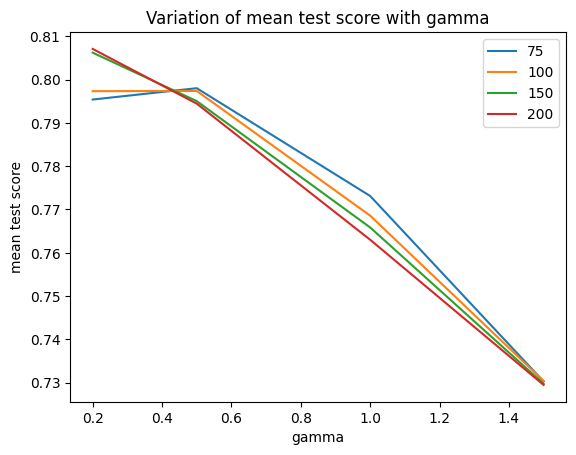

In [ ]:
# Variation of mean test score with gamma and C = 75

mean_score_gamma = grid_df[grid_df['param_C']==75]['mean_test_score']
gamma = grid_df[grid_df['param_C']==75]['param_gamma']


plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma,label='_Hidden')
plt.xlabel('gamma')
plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 100

mean_score_gamma = grid_df[grid_df['param_C']==100]['mean_test_score']
gamma = grid_df[grid_df['param_C']==100]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 150

mean_score_gamma = grid_df[grid_df['param_C']==150]['mean_test_score']
gamma = grid_df[grid_df['param_C']==150]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend(['200'])

# Variation of mean test score with gamma and C = 200

mean_score_gamma = grid_df[grid_df['param_C']==200]['mean_test_score']
gamma = grid_df[grid_df['param_C']==200]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend([75,100,150,200])


plt.show()


In [ ]:
# attempt 2 - SVC model 2
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#pipe=Pipeline([('featsel',SelectFromModel(SVC()))])
C_var=np.array([150,200,300,400])
gamma_var=np.array([0.1,0.2,0.5,1])
#kerna_var=['linear','poly','rbf','sigmoid']
svc_2=SVC()
param_grid={'C':C_var,'gamma':gamma_var}
grid_2=GridSearchCV(svc_2,param_grid,cv=kfo,scoring='balanced_accuracy')
grid_2.fit(X_train,y_train)
acc_train_SVC_2 = balanced_accuracy_score(y_train,grid_2.predict(X_train))
acc_test_SVC_2 = balanced_accuracy_score(y_test,grid_2.predict(X_test))
print('training balanced-accuracy: ',acc_train_SVC_2)
print('test balanced-accuracy: ',acc_test_SVC_2)
svc_2_model=grid_2.best_estimator_

training balanced-accuracy:  0.9505786401554843
test balanced-accuracy:  0.8376291818881777


In [ ]:
grid_2.best_params_,grid_2.best_score_

({'C': np.int64(300), 'gamma': np.float64(0.2)},
 np.float64(0.8265629065119414))

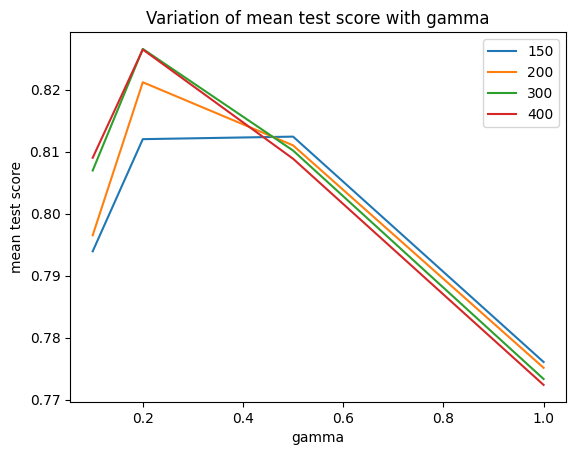

In [ ]:
# Variation of mean test score with gamma and C = 150
grid_df1=DataFrame(grid_2.cv_results_)

mean_score_gamma = grid_df1[grid_df1['param_C']==150]['mean_test_score']
gamma = grid_df1[grid_df1['param_C']==150]['param_gamma']


plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma,label='_Hidden')
plt.xlabel('gamma')
plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 200

mean_score_gamma = grid_df1[grid_df1['param_C']==200]['mean_test_score']
gamma = grid_df1[grid_df1['param_C']==200]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 300

mean_score_gamma = grid_df1[grid_df1['param_C']==300]['mean_test_score']
gamma = grid_df1[grid_df1['param_C']==300]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 400

mean_score_gamma = grid_df1[grid_df1['param_C']==400]['mean_test_score']
gamma = grid_df1[grid_df1['param_C']==400]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend([150,200,300,400])


plt.show()


In [11]:
# attempt 3 - SVC model with class_weight
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#pipe=Pipeline([('featsel',SelectFromModel(SVC()))])
C_var=np.array([75,100,150,200])
gamma_var=np.array([0.2,0.5,1,1.5])
class_weight=['balanced',None]
#kerna_var=['linear','poly','rbf','sigmoid']
svc_3=SVC()
param_grid={'C':C_var,'gamma':gamma_var,'class_weight':class_weight}
grid=GridSearchCV(svc_3,param_grid,cv=kfo,scoring='balanced_accuracy')
grid.fit(X_train,y_train)
grid.best_params_,grid.best_score_
acc_train_SVC = balanced_accuracy_score(y_train,grid.predict(X_train))
acc_test_SVC = balanced_accuracy_score(y_test,grid.predict(X_test))
print('training balanced-accuracy: ',acc_train_SVC)
print('test balanced-accuracy: ',acc_test_SVC)
svc_3_model=grid.best_estimator_

training balanced-accuracy:  0.9478403241821663
test balanced-accuracy:  0.8454146199734742


In [12]:
grid.best_params_,grid.best_score_

({'C': np.int64(75), 'class_weight': 'balanced', 'gamma': np.float64(0.2)},
 np.float64(0.8385238806825368))

In [15]:
grid_df=DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.270886,0.439539,0.260035,0.074154,75,balanced,0.2,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.838149,0.873088,...,0.871703,0.821655,0.823387,0.812875,0.838962,0.835059,0.847260,0.838524,0.019477,1
1,2.708031,0.506287,0.276964,0.068946,75,balanced,0.5,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.806292,0.855415,...,0.856066,0.828072,0.819632,0.794139,0.819491,0.839341,0.814724,0.822806,0.021050,5
2,3.549338,0.598165,0.297871,0.066525,75,balanced,1.0,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.760278,0.788277,...,0.796719,0.785945,0.792356,0.745483,0.791457,0.778366,0.787602,0.782074,0.015711,17
3,4.180263,0.673659,0.313721,0.070135,75,balanced,1.5,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.724725,0.767002,...,0.749788,0.738986,0.758854,0.701830,0.767327,0.730492,0.732433,0.742698,0.019836,25
4,2.645638,0.689017,0.285776,0.147849,75,None,0.2,"{'C': 75, 'class_weight': None, 'gamma': 0.2}",0.806847,0.835620,...,0.822010,0.785061,0.768974,0.777148,0.798707,0.815081,0.808455,0.799985,0.020334,16


In [ ]:
grid_3_df=grid_df[grid_df['param_class_weight']=='balanced']
grid_3_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.841967,0.887975,0.313013,0.132768,75,balanced,0.2,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.892625,0.854692,...,0.832076,0.852669,0.839661,0.851542,0.840554,0.819833,0.815133,0.841475,0.022188,1
1,2.634425,0.449890,0.255423,0.051937,75,balanced,0.5,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.849524,0.835688,...,0.803408,0.846898,0.819953,0.816631,0.836226,0.807044,0.802047,0.822445,0.017291,5
2,3.196395,0.353762,0.289743,0.076423,75,balanced,1.0,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.767463,0.806083,...,0.773131,0.804503,0.761943,0.774214,0.802210,0.759358,0.791991,0.779906,0.018397,17
3,4.060629,0.484915,0.332763,0.092179,75,balanced,1.5,"{'C': 75, 'class_weight': 'balanced', 'gamma':...",0.743411,0.749865,...,0.734309,0.775994,0.724767,0.718166,0.762401,0.723775,0.732080,0.737757,0.019139,25
8,2.256536,0.364018,0.250309,0.065712,100,balanced,0.2,"{'C': 100, 'class_weight': 'balanced', 'gamma'...",0.866943,0.851911,...,0.831261,0.854024,0.837759,0.845105,0.836913,0.813171,0.804381,0.836584,0.018159,3


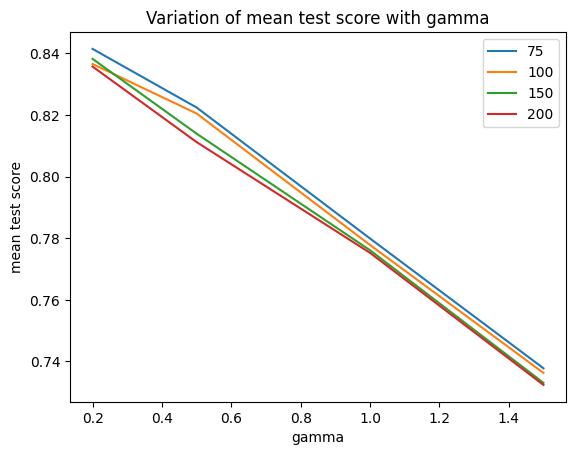

In [ ]:
# Variation of mean test score with gamma and C = 75

mean_score_gamma = grid_3_df[grid_3_df['param_C']==75]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==75]['param_gamma']


plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma,label='_Hidden')
plt.xlabel('gamma')
plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 100

mean_score_gamma = grid_3_df[grid_3_df['param_C']==100]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==100]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 150

mean_score_gamma = grid_3_df[grid_3_df['param_C']==150]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==150]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend(['200'])

# Variation of mean test score with gamma and C = 200

mean_score_gamma = grid_3_df[grid_3_df['param_C']==200]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==200]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend([75,100,150,200])


plt.show()


In [ ]:
# attempt 4 - SVC model with class_weight
from math import gamma
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#pipe=Pipeline([('featsel',SelectFromModel(SVC()))])
C_var=np.array([50,75,100,200])
gamma_var=np.array([0.15,0.2,0.5,1])
class_weight=['balanced',None]
#kerna_var=['linear','poly','rbf','sigmoid']
svc_4=SVC()
param_grid={'C':C_var,'gamma':gamma_var,'class_weight':class_weight}
grid=GridSearchCV(svc_4,param_grid,cv=kfo,scoring='balanced_accuracy')
grid.fit(X_train,y_train)
grid.best_params_,grid.best_score_
acc_train_SVC = balanced_accuracy_score(y_train,grid.predict(X_train))
acc_test_SVC = balanced_accuracy_score(y_test,grid.predict(X_test))
print('training balanced-accuracy: ',acc_train_SVC)
print('test balanced-accuracy: ',acc_test_SVC)
svc_4_model=grid.best_estimator_

training balanced-accuracy:  0.9423255865573585
test balanced-accuracy:  0.8475515602266477


In [ ]:
grid.best_params_,grid.best_score_

({'C': np.int64(100), 'class_weight': 'balanced', 'gamma': np.float64(0.15)},
 np.float64(0.8429594232789499))

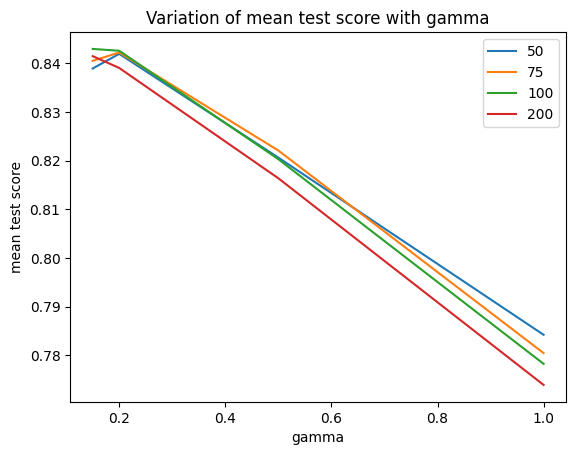

In [ ]:
grid_df=DataFrame(grid.cv_results_)
grid_3_df=grid_df[grid_df['param_class_weight']=='balanced']
# Variation of mean test score with gamma and C = 50

mean_score_gamma = grid_3_df[grid_3_df['param_C']==50]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==50]['param_gamma']


plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma,label='_Hidden')
plt.xlabel('gamma')
plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 75

mean_score_gamma = grid_3_df[grid_3_df['param_C']==75]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==75]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 100

mean_score_gamma = grid_3_df[grid_3_df['param_C']==100]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==100]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')


# Variation of mean test score with gamma and C = 200

mean_score_gamma = grid_3_df[grid_3_df['param_C']==200]['mean_test_score']
gamma = grid_3_df[grid_3_df['param_C']==200]['param_gamma']

plt.plot(gamma,mean_score_gamma)
#plt.scatter(gamma,mean_score_gamma)
#plt.xlabel('gamma')
#plt.ylabel('mean test score')
plt.title('Variation of mean test score with gamma')
plt.legend([50,75,100,200])


plt.show()


In [16]:
svc_model=svc_3_model
#svc_model=svc_2_model
svc_model.fit(Xtr_standardized,ytr)

SVC(C=np.int64(75), class_weight='balanced', gamma=np.float64(0.2))

In [17]:
balanced_accuracy_score(ytr,svc_model.predict(Xtr_standardized))

np.float64(0.9500715722156816)

In [18]:
balanced_accuracy_score(y_test,svc_model.predict(X_test))

np.float64(0.9530789157326283)

In [19]:
# save the model: you must use the .bz2 format for sklearn models!
model_savepath = 'model_linear.bz2' # could be model_tree.bz2 if using sklearn for the tree competition!
with bz2.BZ2File(model_savepath, 'w') as f:
    pickle.dump(svc_model,f)

In [20]:
# generate kaggle submission file using the validation script
!python {"kaggle_csv.py " + model_savepath + " --Xka_path " + Xka_savepath + " --Xtr_path " + Xtr_savepath + " --yka_hat_path " + yka_hat_savepath}

training balanced-accuracy =  0.9500715722156816
kaggle label predictions saved in yka_hat_linear.csv


In [ ]:
# another way to generate kaggle submission file using the validation script
#%run {"kaggle_csv.py " + model_savepath + " --Xka_path " + Xka_savepath + " --Xtr_path " + Xtr_savepath + " --yka_hat_path " + yka_hat_savepath }

training balanced-accuracy =  0.3490330468500774
kaggle label predictions saved in yka_hat_linear.csv
